<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Thanks for taking the time to improve the project! It is accepted now! Good luck on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but there are some problems that need to be fixed before the project is accepted. Let me know if you have any questions!

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 9.6 MB 16.8 MB/s eta 0:00:01███████████▌                  | 4.1 MB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 57.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


## Importing Modules

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

from IPython.display import display
import math
import random

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Viewing the frequency of the values in the data.

In [4]:
df['Insurance benefits'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Insurance benefits, dtype: int64

We rename the colums to make the code look more consistent with its style.

In [5]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [6]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2083,1,21.0,28200.0,0,0
3419,1,19.0,41600.0,1,0
312,1,33.0,43700.0,2,0
4278,1,19.0,37300.0,2,0
3851,1,40.0,42700.0,0,0
4419,1,32.0,18700.0,0,0
773,0,21.0,35300.0,1,0
3987,1,30.0,14400.0,2,0
1268,0,26.0,33900.0,0,0
4357,0,23.0,33100.0,1,0


Viewing the columns and types in the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Changing the age column from the datatype float to int

In [8]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype('int')

Sanity checking that the age column was changed to an int datatype.

In [9]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [10]:
# now have a look at the data's descriptive statistics. 
# Does everythinglook okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Examining how many duplicated rows there are.

In [11]:
df.duplicated().sum()

153

Dropping the duplicated rows and resetting the index

In [12]:
df = df.drop_duplicates().reset_index()

Sanity checking to make sure that the duplicates are indeed dropped.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4847 non-null   int64  
 1   gender              4847 non-null   int64  
 2   age                 4847 non-null   int64  
 3   income              4847 non-null   float64
 4   family_members      4847 non-null   int64  
 5   insurance_benefits  4847 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 227.3 KB


<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

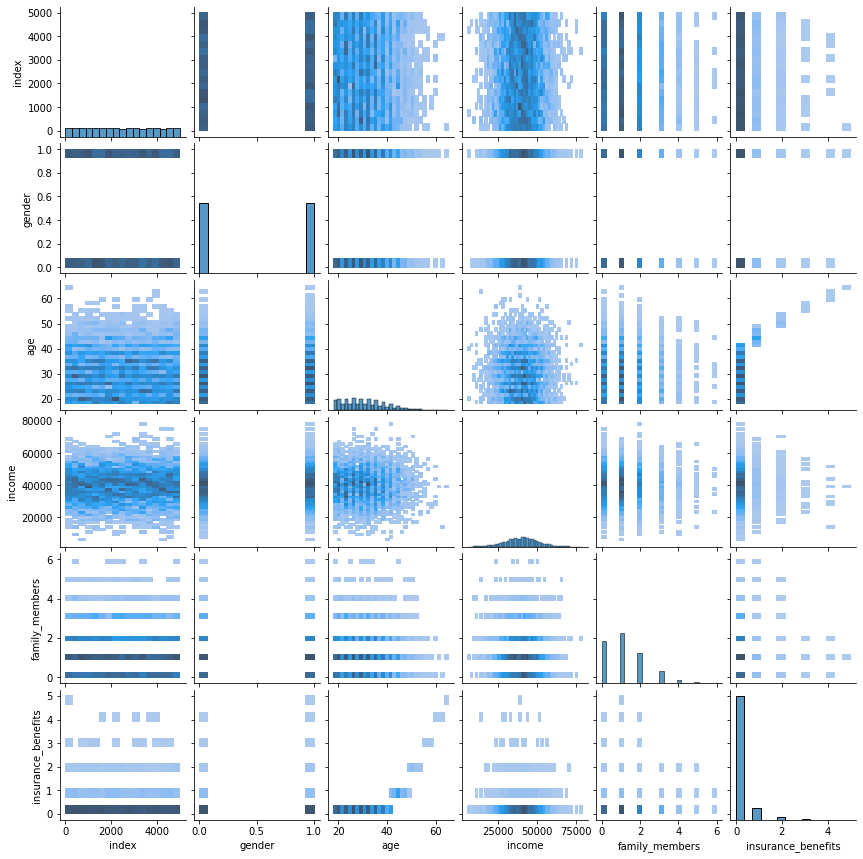

In [14]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

Creating a features and target from our dataset. The target is to predict how many insurance benefits each customer is likely to buy from the company.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

This seems out of place, as the first task is an unsupervised learning task

</div>

<div class="alert alert-info">
  Good Point. I moved it down to the first place that I used features and targets.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

### Scaled Data

Creating a list of the feature names

In [15]:
feature_names = ['gender', 'age', 'income', 'family_members']

Created a function for the k_nearest_neighbors to scale the data

In [16]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors = k, metric = metric)
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[n][feature_names].values.reshape(1, -1), k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

<div class="alert alert-success">
<b>Reviewer's comment</b>

The code for finding nearest neighbors is correct

</div>

In [17]:
df.sample(5)

,index,gender,age,income,family_members,insurance_benefits
2032,2063,1,23,43000.0,1,0
1824,1852,0,27,57500.0,2,0
746,750,0,40,53700.0,0,0
4273,4407,0,41,10800.0,1,0
886,893,0,40,54900.0,4,0


Scaling each feature by it's maximum absolute value

In [18]:
feature_names = ['gender', 'age', 'income', 'family_members']
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [19]:
df_scaled.sample(5)

,index,gender,age,income,family_members,insurance_benefits
4191,4324,1.0,0.430769,0.418987,0.000000,0
221,221,0.0,0.676923,0.444304,0.333333,1
368,369,1.0,0.476923,0.183544,0.000000,0
2569,2624,1.0,0.292308,0.472152,0.000000,0
4805,4957,1.0,0.415385,0.662025,0.000000,0


Now, let's get similar records for a given one for every combination

Manhattan distance with original datframe

In [20]:
get_knn(df, 5, 5, 'manhattan')

,index,gender,age,income,family_members,insurance_benefits,distance
5,5,1,43,41000.0,2,1,0.0
3695,3801,0,46,41000.0,2,1,4.0
3860,3972,1,40,41000.0,1,0,4.0
4617,4763,1,46,41000.0,1,1,4.0
1965,1995,0,45,41000.0,0,1,5.0


Euclidean distance with original datframe

In [21]:
get_knn(df, 5, 5, 'euclidean')

,index,gender,age,income,family_members,insurance_benefits,distance
5,5,1,43,41000.0,2,1,0.000000
1965,1995,0,45,41000.0,0,1,3.000000
4617,4763,1,46,41000.0,1,1,3.162278
3695,3801,0,46,41000.0,2,1,3.162278
3860,3972,1,40,41000.0,1,0,3.162278


Manhattan distance with scaled datframe

In [22]:
get_knn(df_scaled, 5, 5, 'manhattan')

,index,gender,age,income,family_members,insurance_benefits,distance
5,5,1.0,0.661538,0.518987,0.333333,1,0.000000
3955,4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1136,1147,1.0,0.646154,0.516456,0.333333,0,0.017916
2897,2962,1.0,0.630769,0.520253,0.333333,0,0.032035
1011,1019,1.0,0.646154,0.501266,0.333333,0,0.033106


Euclidean distance with scaled datframe

In [23]:
get_knn(df_scaled, 5, 5, 'euclidean')

,index,gender,age,income,family_members,insurance_benefits,distance
5,5,1.0,0.661538,0.518987,0.333333,1,0.000000
1136,1147,1.0,0.646154,0.516456,0.333333,0,0.015592
3955,4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1011,1019,1.0,0.646154,0.501266,0.333333,0,0.023468
2897,2962,1.0,0.630769,0.520253,0.333333,0,0.030795


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

The distance is not scaled and the indices of people are different because the distances are different. So, in the non-scaled forms we have indexes 5, 1965, 4617, 3695, and 3860 in different orders but the same indexes. Whereas, the scaled dataframe gives us indexes 5, 1136, 3955, 1101, and 2897 just in different orders between the two.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results are very similar in that we get the same indexes just in different orders in both the Euclidean and Manhattan for the original dataframe and the scaled dataframe, respectively. The distance itself is close using both metrics as well.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Indeed! To expand on how scaling affects kNN: if we look at the nearest neighbors with unscaled data, all the top results have exactly the same income. That is because income has a much bigger magnitude than other features, and so differences in income weigh much more, so other features are treated as less important. Scaling bring all features on equal footage.

</div>

<div class="alert alert-info">
 I'm just clarifying. The reason that income has a much bigger magnitude is because we're working with much greater numbers, not because kNN has a built in function that income is more important correct?
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yes, that's exactly what I meant! :)

</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

Calculating the target, with insurance benefits greater than 0

In [24]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [25]:
# calculate the target

df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good!

</div>

Looking at the dataframe that we created to see the target

In [26]:
df['insurance_benefits_received']

0       0
1       1
2       0
3       0
4       0
       ..
4842    0
4843    0
4844    0
4845    0
4846    0
Name: insurance_benefits_received, Length: 4847, dtype: int64

Creating a features and target from our dataset. The target is to predict how many insurance benefits each customer is likely to buy from the company.

In [27]:
features = df.drop(['index', 'insurance_benefits'], axis=1)
target = df['insurance_benefits']

Viewing a histogram of the features in the dataframe 

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'family_members'}>],
       [<AxesSubplot:title={'center':'insurance_benefits_received'}>,
        <AxesSubplot:>]], dtype=object)

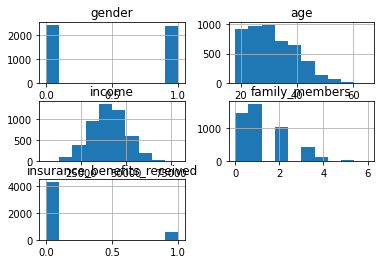

In [28]:
features.hist()

Viewing the target dataframe's frequency for insurance benefits owned by each customer

<AxesSubplot:>

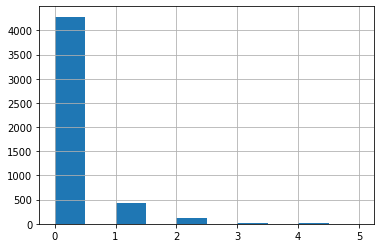

In [29]:
target.hist()

Splitting the data into X_train, X_test, y_train, y_test to be able to use it later

In [30]:
train, test = train_test_split(df, test_size = 0.3, random_state=12345)

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train['insurance_benefits_received']
y_test = test['insurance_benefits_received']

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok!

</div>

Examining the test values for x

In [31]:
X_test

,gender,age,income,family_members
1321,1,23,47200.0,0
3767,1,32,65900.0,0
166,1,33,33900.0,2
2935,0,39,19300.0,2
423,0,46,27500.0,2
...,...,...,...,...
1818,1,19,46500.0,2
641,1,20,34300.0,1
2667,1,36,64000.0,3
3342,0,31,18600.0,1


Viewing the class imbalance of the insurance benefits that are received

In [32]:
# check for the class imbalance with value_counts()

# <your code here>
df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

Creating an F1 score evaluator function and a confusion matrix function to be able to better see the score and differences using these metrics.

In [33]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

Generating a random model

In [34]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

Looking at the probability, F1 score and confusion matrix from our dataframes

In [35]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df['insurance_benefits_received']))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

The probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

The probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



<div class="alert alert-success">
<b>Reviewer's comment</b>

Random baseline looks good!

</div>

Created a K-Nearest Neighbor class to be able to use for different functions

In [36]:
class KNN_Classifier():
    
    def __init__(self, n_neighbors, metric, threshold):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.threshold = threshold
        self.model = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
    
    def fit(self, X, y):
        self.features = X
        self.target = y
        self.model.fit(self.features, self.target)
    
    def change_num_neighbors(self, new_n_neighbors):
        self.model.set_params(n_neighbors = new_n_neightbors)
    
    def predict(self, X):
        nbrs_distances, nbrs_indices = self.model.kneighbors(X, self.n_neighbors, return_distance=True)
        probabilities = []
        predictions = []
        for elem in nbrs_indices:
            probability = self.target.iloc[elem].mean()
            probabilities.append(probability)
            if probability > 0.5:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's nice that while you used a library class to find nearest neighbors you implemented a classifier yourself :)
    
Your implemenation looks correct!

</div>

Fitting my KNN classifier to use for the predictions.

In [37]:
knn_classifier = KNN_Classifier(n_neighbors = 5, metric = 'manhattan', threshold=0.5)
knn_classifier.fit(X_train, y_train)

Predicting my KNN_classifier on my X_test.

In [38]:
y_pred = knn_classifier.predict(X_test)
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [39]:
print(f"F1 Score: {f1_score(y_test, (y_pred))}")

F1 Score: 0.22885572139303484


In [40]:
train, test = train_test_split(df_scaled, test_size = 0.3, random_state=12345)

X_scaled_train = train[feature_names]
X_scaled_test = test[feature_names]


In [41]:
y_test.value_counts()

0    1287
1     168
Name: insurance_benefits_received, dtype: int64

In [42]:
X_scaled_test

,gender,age,income,family_members
1321,1.0,0.353846,0.597468,0.000000
3767,1.0,0.492308,0.834177,0.000000
166,1.0,0.507692,0.429114,0.333333
2935,0.0,0.600000,0.244304,0.333333
423,0.0,0.707692,0.348101,0.333333
...,...,...,...,...
1818,1.0,0.292308,0.588608,0.333333
641,1.0,0.307692,0.434177,0.166667
2667,1.0,0.553846,0.810127,0.500000
3342,0.0,0.476923,0.235443,0.166667


In [43]:
# check for the class imbalance with value_counts()

# <your code here>
df_scaled['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [44]:
for P in [0, df_scaled['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_scaled = rnd_model_predict(P, len(df_scaled['insurance_benefits_received']))
        
    eval_classifier(df_scaled['insurance_benefits_received'], y_pred_scaled)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

The probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

The probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



In [45]:
knn_classifier = KNN_Classifier(n_neighbors = 5, metric = 'manhattan', threshold = 0.5)
knn_classifier.fit(X_scaled_train, y_train)

In [46]:
scaled_pred = knn_classifier.predict(X_scaled_test)
scaled_pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [47]:

print(f1_score(y_test, scaled_pred))

0.8980891719745222


## Conclusion

The scaled data has a much better F1 score than the scaled data. We can see that once we scale our data the F1 Score goes up by a large amount from 0.22 to 0.90, if rounding. That's a significant increase in the precision and recall of our model.

<div class="alert alert-info">
Can you help with why my F1_Score is so low? And then I will create a conclusion.
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

It seems that the problem is that you split the data into train and test twice without setting the random state, which means that the rows going into train and test are different, but you're reusing the targets from the first split.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. Alright, so you made prediction for the test set, but now we need to evaluate this predictions against targets using `eval_classifier` function. Note that to calculate F1 score we need binary prediction rather than probabilities, so you need to convert your probabilities to binary predictions somehow.
    
2. Also you seem to have missed this part of the task:
    
    > Build a KNN-based classifier and **measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one**.

    So you need to try this classifier on both scaled and unscaled data and try different value of `n_neighbors` between 1 and 10.
    
    Note that for supervised learning to avoid data leakage scaling should be applied after splitting the data into train and test: the scaler is trained using the train set and then it is used to transform both train and test.

    Don't forget to add a conclusion for this task!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Great! This illustrates the importance of scaling for distance-based algorithms like kNN

</div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

Creating a class to use for linear regression for all of the tasks that use linear regression.

In [48]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        w = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        
    def predict(self, X):
        
        # adding the unities
        return X.dot(self.w) + self.w0
        

<div class="alert alert-success">
<b>Reviewer's comment</b>

Linear regression was implemented correctly!
    

</div>

Creating a function for eval_regressor, to be able to get the RMSE and R2 scores for later tasks.

In [49]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

Viewing the vector lr.w, the RMSE, and the R2 Score. The RMSE came out to 0.36 and the R2 Score arrived at 0.66

In [50]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.w)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.58042291e-02  1.95594888e-02  5.85336165e-07 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


In [51]:
eval_regressor(y_test, y_test_pred)

RMSE: 0.36
R2: 0.66


Viewing the scaled data's lr.w, RMSE, and R2 Score. The RMSE came out to 0.34 and the R2 score arrived at 0.65.

In [52]:
lr = MyLinearRegression()

lr.fit(X_scaled_train, y_train)
print(lr.w)

y_scaled_pred = lr.predict(X_scaled_test)
eval_regressor(y_test, y_scaled_pred)

[ 0.01955949  2.32727489  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


### Task 3 Conclusions

As we see, we scaled our data and checked it on the linear regression model and also did the same to the unscaled data and our RMSE and R2 score are very similar in both instances. Both the scaled and the unscaled data came out with an RMSE around 0.35 and an R2 score around 0.65.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Similarly to the last task here you are supposed to try the model with and without scaling. Don't forget about conclusions!

</div>

<div class="alert alert-info">
Now, it is updated! Thank you.
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Can you check the code please? It produces an error saying `y_scaled_train` is not defined

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Very good! Note that scaling can still be useful for linear regression, for example, if we apply L1/L2 regularization

</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [53]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

Viewing the df_pn dataframe to see the information 

In [54]:
df_pn

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4842,0,28,35700.0,2
4843,0,34,52400.0,1
4844,0,20,33900.0,2
4845,1,22,32700.0,3


In [55]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [56]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

The matrix has a determinant that is not equal to 0 and we show the inverse matrix.

In [57]:
print('Original Random Matrix')
print(P)
print('\nDeterminant:')
print(np.linalg.det(P))
print('\nInverse Matrix:')
inverse_P = np.linalg.inv(P)
print(np.linalg.inv(P))
print('\nIdentity Matrix')
print(np.dot(P, inverse_P))

Original Random Matrix
[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]

Determinant:
0.24339135998015463

Inverse Matrix:
[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]

Identity Matrix
[[ 1.00000000e+00 -1.69848573e-16 -7.58122972e-17 -1.13112497e-16]
 [-6.94895396e-17  1.00000000e+00 -7.10568689e-17  3.59096970e-17]
 [-1.21269339e-16 -8.01461326e-17  1.00000000e+00  4.30764008e-19]
 [-3.60694539e-16 -5.55430227e-16  3.08072404e-16  1.00000000e+00]]


Can you guess the customers' ages or income after the transformation?

No, because the data in the matrix has been transformed in a way that you cannot tell the ages or income easily from the Matrix. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

But you didn't apply the transformation yet at this point...

</div>

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

Looking at product of X and P to see what X' is.

In [58]:
x_ = np.dot(X, P)
x_
df3=pd.DataFrame(x_, columns=df_pn.columns )
df3

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378
...,...,...,...,...
4842,4577.581382,16107.740932,13259.688205,33107.974380
4843,6717.000247,23634.217067,19456.138634,48589.438841
4844,4346.223425,15289.241265,12586.162644,31433.508886
4845,4194.093242,14751.991024,12144.029306,30323.887634


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(4, 4)


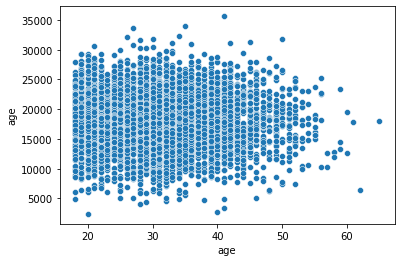

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

#example of easy code to crack 
#sns.scatterplot(df_pn['age'], 3.2*df_pn['age'])
sns.scatterplot(df_pn['age'], df3['age'])

print(P.shape)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='income'>

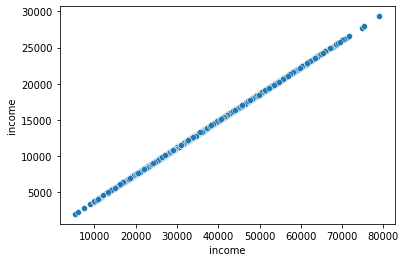

In [60]:
sns.scatterplot(df_pn['income'], df3['income'])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

Original Data:

Examining the X Matrix.

In [61]:
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Looking at X'.

In [62]:
x_

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Multiplying X by P and it's inverse to get an array.

In [63]:
X @ P @ np.linalg.inv(P)

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

The array above and the original X value have the same values. This is proving that we can recover the original data from 𝑋′
 if you know P. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Not sure where the formula $P^{-1} X^T$ came from. Let's recap: our original data is $X$, we applied the following transformation: $X' = XP$. How do we go back to the original $X$ from $X'$ knowing $P$?

</div>

<div class="alert alert-info">
It has been corrected! :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Indeed, looks good!

</div>

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Some of the values are not, technically the same but -1.928 E -12 is basically saying 0 and a lot of the values that technically aren't the same are just computing issues where the computer won't put the number 0 but will round to an extremely low number that's close to 0.

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yeah, this is an artifact of using [floating point numbers](https://0.30000000000000004.com/) to represent real numbers: it is not possible to store numbers with infinite precision on our computers

</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

W and Wp are linked because Wp is a formula just multiplying w by the inverse of P. The proof below shows that w is hiding in the formula above when you go through the proving process.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Your proof below shows that the equations for $w$ and $w_P$ are different :)

</div>

W, which is the linear regression weight vector and the inverse of P multiplied by that is giving us that weight. Wp is the variable that uses this formula.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Are you saying that predictions will be equal to the weights? It is not necessarily true even from a simple dimensions argument: the weights' length is equal to the number of features, which need not be equal to the number of examples. And even if those dimensions are equal the predictions are only equal to the weights if the feature matrix is an identity matrix.
    
Remember that predictions of linear regression with weights $w$ for a feature matrix $X$ are calculated as $\hat{y} = Xw$. What will the predictions of a model with weights $w_P$ for a feature matrix $X'$ be?

</div>

**Analytical proof**

$$ [(XP)^T (XP)]^ {-1} (XP)^T y$$

$$ [(P^T X^T X)P] ^ {-1}P^T X^T y$$
$$ P^{-1} [P^T X^T X]^{-1} (XP)^T y$$
$$ P^{-1} [X^TX]^{-1}[P^T]^{-1}P^T X^Ty $$
$$ P^{-1} [X^TX]^{-1}X^Ty$$

Therefore:
<br></br>
$$ Wp = P^{-1}w$$

Using the equation to get the weight alone. 

$$ P * Wp = P * P^{-1}w $$
$$ w = P * Wp $$

Solving for Y-hat in terms of Xw, but substituting in the new variables. The feature matrix is X' = XP and w = P * WP. So, these are going to be substituted into the equation.

$$ ŷ = Xw $$
$$ ŷ = X * P * Wp $$
$$ ŷ = X' * Wp $$

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Not sure how you lost the $P^{-1}$ in the last line :) Up to that point the transformations are correct though. As we know that $w = (X^T X)^{-1} X^T y$, in fact you showed that $$w_P = P^{-1} w$$

</div>

  
<div class="alert alert-info">
Updated and should be complete. I missed the transformation of [X^{T} X]^{-1} X^{T} y, to w. Now I see it!
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Right, but we're not quite done yet! Remember that what we actually wanted to prove is that the RMSE of the model trained on obfuscated data will be the same.
    
Now we know that the weights of the new model are equal to $w_P = P^{-1}w$. And the feature matrix is $X' = XP$.
    
As we know, predictions of the linear regression model with weights $w$ on a feature matrix $X$ are $\hat{y} = Xw$.
    
What will the predictions of the obfuscated model be? How do they compare to predictions of the old model?

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

It seems that you misunderstood what I'm asking: not writing the code to make predictions on our particular dataset (which is done in the next task), but plugging in the formulas for $w_P$ and $X'$ into the equation to find the theoretical result :)

</div>

  
<div class="alert alert-info">
I think this is the final result I needed. I was a little confused by your comment. My mistake I didn't realize what you were asking for. If it is not correct please let me know and I'll continue to work on it. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V4</b>

Almost there, but we can also plug in the formulas for $X'$ and $w_P$ as follows.
    
For original model, we have weights $w$ and a feature matrix $X$, so predictions are 
    
$$\hat{y} = Xw$$
    
For the model trained on obfuscated features, we have weights $w_P = P^{-1} w$ and an obfuscated feature matrix $X' = XP$, so predictions are
    
$$\hat{y_P} = X' w_P = XPP^{-1} w = Xw = \hat{y}$$
    
Exactly the same as the predictions of the original model. Thus RMSE must be the same too.
    
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

Creating a seed value for linear regression

In [64]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

Creating a random matrix that is a square.

In [65]:
random_matrix = np.random.randint(1,10,size=(3,3))

Viewing random matrix

In [66]:
random_matrix

array([[7, 4, 8],
       [5, 7, 3],
       [7, 8, 5]])

Viewing the original, the determinant, the inverse, and the dot product to make sure it's an identity matrix.

In [67]:
print('Original Random Matrix')
print(random_matrix)
print('\nDeterminant:')
print(np.linalg.det(random_matrix))
print('\nInverse Matrix:')
inverse_random_matrix = np.linalg.inv(random_matrix)
print(np.linalg.inv(P))
print('\nIdentity Matrix')
print(np.dot(random_matrix, inverse_random_matrix))

Original Random Matrix
[[7 4 8]
 [5 7 3]
 [7 8 5]]

Determinant:
-11.00000000000003

Inverse Matrix:
[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]

Identity Matrix
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  1.00000000e+00  2.66453526e-15]
 [ 6.66133815e-16  8.88178420e-16  1.00000000e+00]]


Multiplying X and P matrices.

In [68]:
X_dot_P = X @ P

Examining the RMSE and the R2 Score of the Linear Regression Model with original matrices

The RMSE came out to 0.37 and the R2 score came out to 0.66

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)
lr = MyLinearRegression()
lr.fit(X_train, y_train)
print(lr.w)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.06417161e-03  3.57036683e-02  2.58037024e-07 -1.52030029e-02]
RMSE: 0.37
R2: 0.66


Examining the RMSE and the R2 Score with X_dot_P in the Linear Regression Model

The RMSE came out to the exact same score of 0.37 and the R2 score came out to the exact same score of 0.66

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_dot_P, y, test_size=0.2, random_state=seed_value)
lr = MyLinearRegression()
lr.fit(X_train, y_train)
print(lr.w)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.06781164 -0.00440644  0.08359569 -0.02193077]
RMSE: 0.37
R2: 0.66


---

# Conclusions

With an RMSE of 0.37 it can be said that the model can relatively predict the data accurately. Therefore, we could use our model as a basis and hypertune it to make it even more accurate.

We can see that in our task above our transformation algorithm and our regular model all of our results are pretty equal to each other. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, the experiment was conducted correctly! So in practice our transformation doesn't affect the quality of the model.

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells are arranged in order of logic and execution
- [x]  Task 1 has been performed
    - [x]  There is the procedure that can return k similar customers for a given one
    - [x]  The procedure is tested for all four proposed combinations
    - [x]  The questions re the scaling/distances are answered
- [x]  Task 2 has been performed
    - [x]  The random classification model is built and tested for all for probability levels
    - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [x]  Task 3 has been performed
    - [x]  The linear tegression solution is implemented with matrix operations.
    - [x]  RMSE is calculated for the implemented solution.
- [x]  Task 4 has been performed
    - [x]  The data is obfuscated with a random and invertible matrix P
    - [x]  The obfuscated data is recoved, few examples are printed out
    - [x]  The analytical proof that the transformation does not affect RMSE is provided 
    - [x]  The computational proof that the transformation does not affect RMSE is provided
- [x]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>